In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# Yo

/kaggle/input/kidney-stone-prediction-based-on-urine-analysis/kindey stone urine analysis.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 936.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import RandomizedSearchCV

In [5]:
data = pd.read_csv("/kaggle/input/kidney-stone-prediction-based-on-urine-analysis/kindey stone urine analysis.csv")
data

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04,1
75,1.017,4.81,410,13.3,195,0.58,1
76,1.024,5.40,803,21.8,394,7.82,1
77,1.016,6.81,594,21.4,255,12.20,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


### Type Casting

In [7]:
data["target"] = np.where(data["target"] == 0, "No", data["target"])
data["target"] = np.where(data["target"] == "1", "Yes", data["target"])

data


,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,No
1,1.017,5.74,577,20.0,296,4.49,No
2,1.008,7.20,321,14.9,101,2.36,No
3,1.011,5.51,408,12.6,224,2.15,No
4,1.005,6.52,187,7.5,91,1.16,No
...,...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04,Yes
75,1.017,4.81,410,13.3,195,0.58,Yes
76,1.024,5.40,803,21.8,394,7.82,Yes
77,1.016,6.81,594,21.4,255,12.20,Yes


In [8]:
data.isna().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [9]:
data.describe()

,gravity,ph,osmo,cond,urea,calc
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000


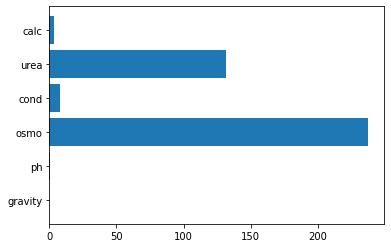

In [10]:
plt.barh(width = data.std(), y = data.iloc[:,:-1].columns)
plt.show()

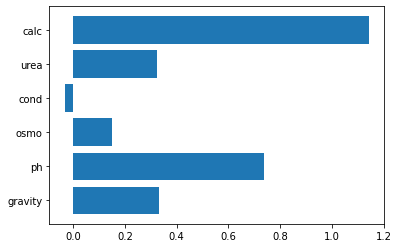

In [11]:
plt.barh(width = data.skew(), y = data.iloc[:,:-1].columns)
plt.show()

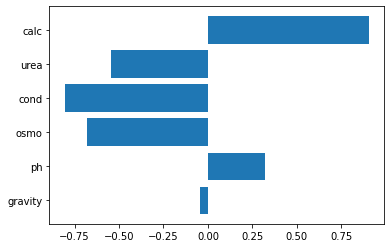

In [12]:
plt.barh(width = data.kurt(), y = data.iloc[:,:-1].columns)
plt.show()

### Univariate Analysis

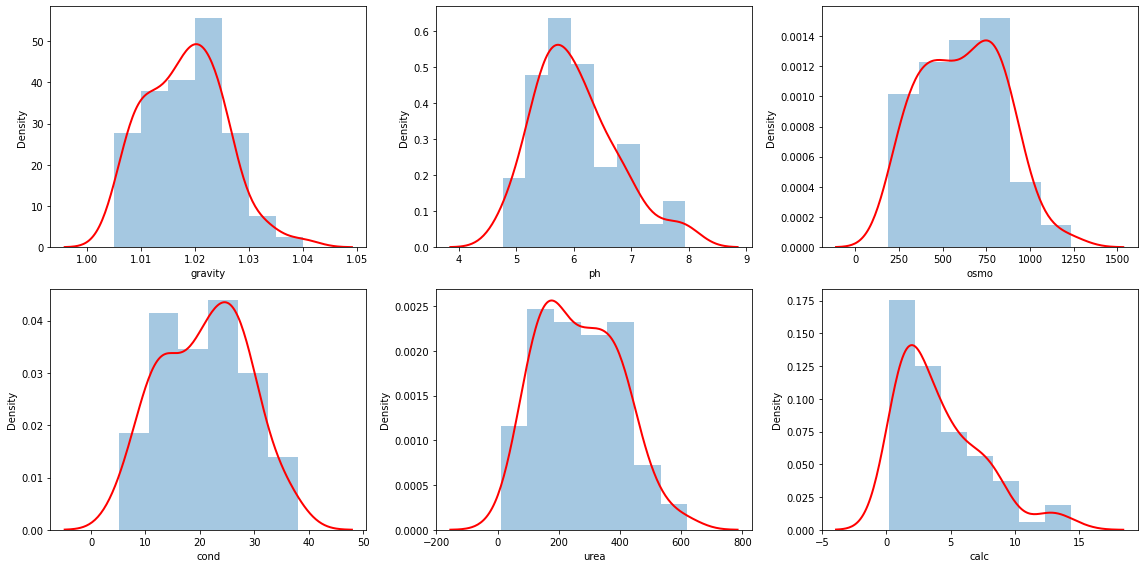

In [13]:
plt.figure(figsize = (16,8))

for i,j in enumerate(data.iloc[:,:-1].columns):

    plt.subplot(2,3,i+1)

    sns.distplot(data[j], kde_kws = {"color":"red", "lw":2})

    plt.tight_layout()

plt.subplots_adjust()
plt.show()

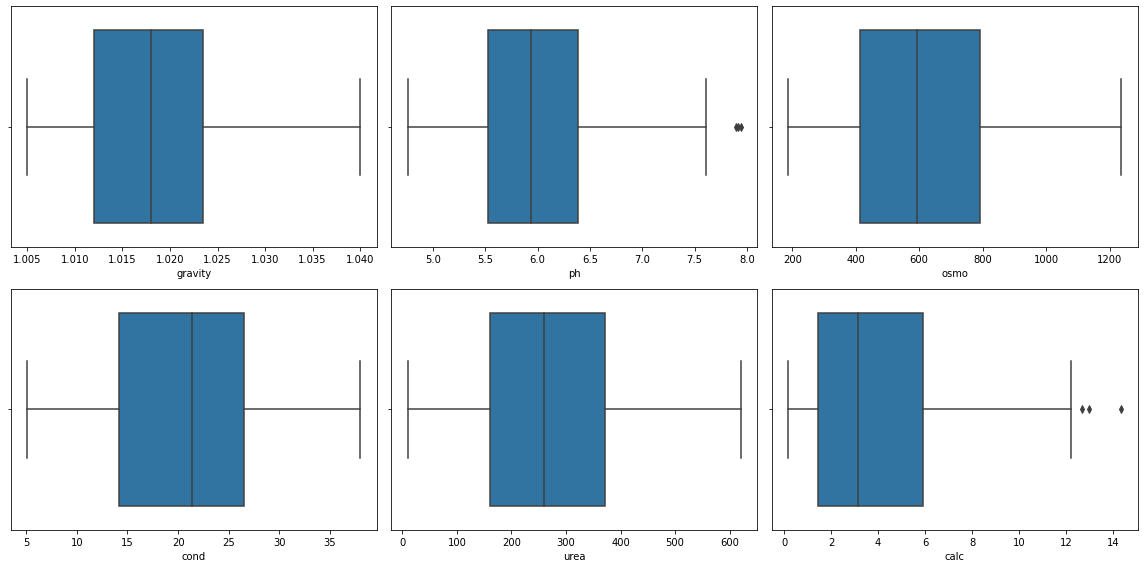

In [14]:
plt.figure(figsize = (16,8))

for i,j in enumerate(data.iloc[:,:-1].columns):

    plt.subplot(2,3,i+1)

    sns.boxplot(data[j])
    plt.xlabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()

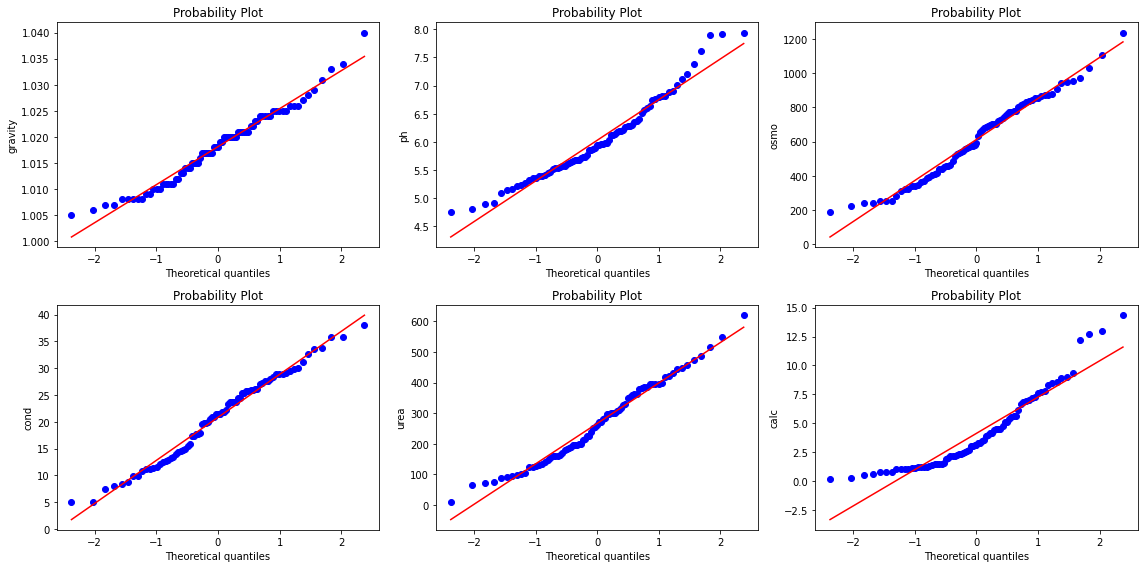

In [15]:
from scipy import stats

plt.figure(figsize = (16,8))

for i,j in enumerate(data.iloc[:,:-1].columns):

    plt.subplot(2,3,i+1)

    stats.probplot(data[j], dist = "norm", plot = plt)
    plt.ylabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()

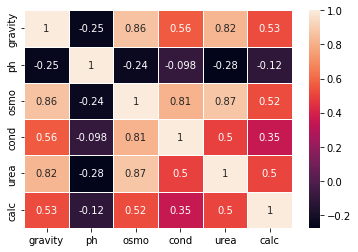

In [16]:
sns.heatmap(data.iloc[:,:-1].corr(), annot = True, linewidths = 1)
plt.show()

### Bivariate Analysis

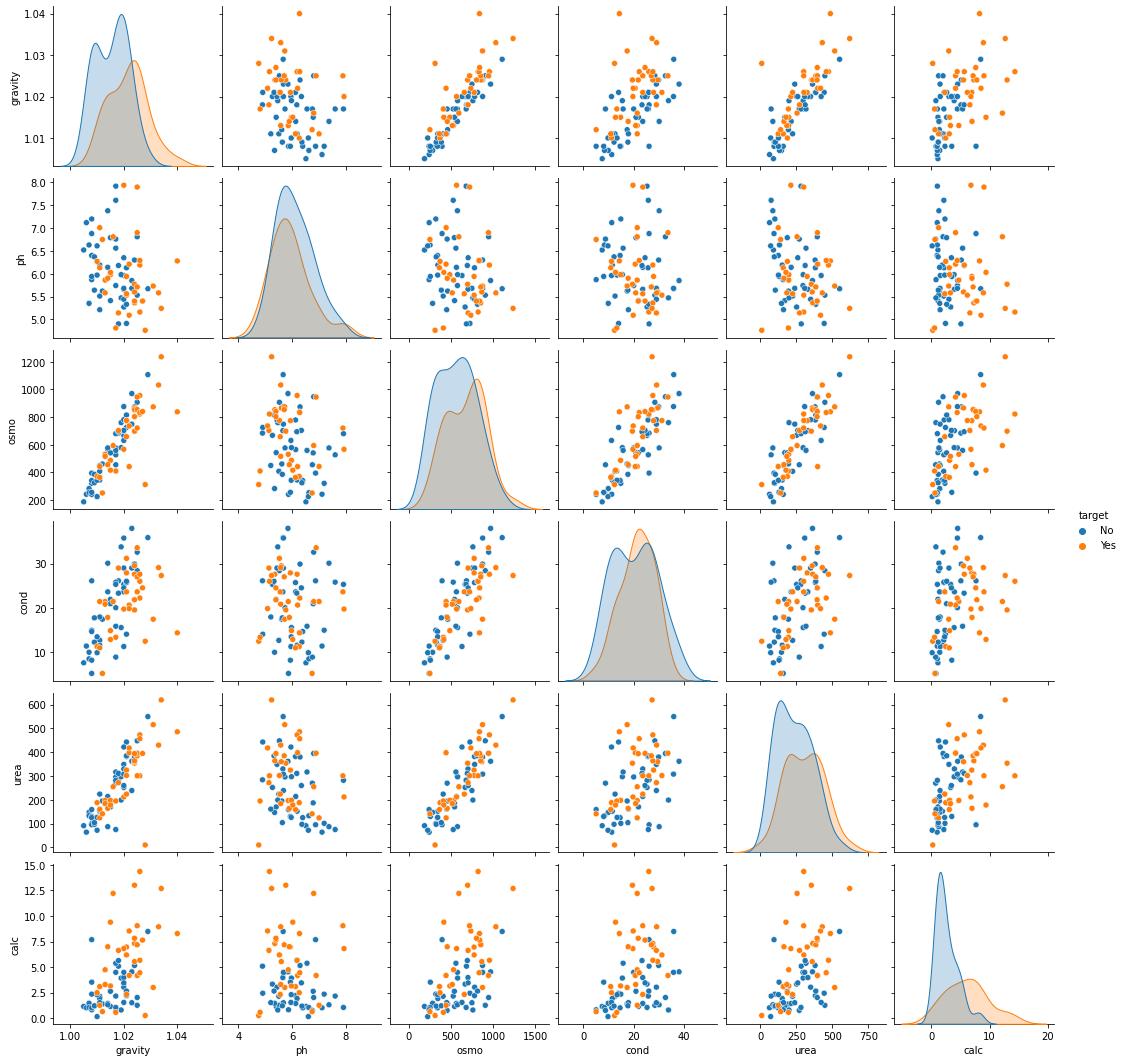

In [17]:
sns.pairplot(data, hue = "target")
plt.show()

### Outliers Treatment

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.9100,725.0,14.0,443.0,2.45,No
1,1.017,5.7400,577.0,20.0,296.0,4.49,No
2,1.008,7.2000,321.0,14.9,101.0,2.36,No
3,1.011,5.5100,408.0,12.6,224.0,2.15,No
4,1.005,6.5200,187.0,7.5,91.0,1.16,No
...,...,...,...,...,...,...,...
74,1.025,7.6675,721.0,23.6,301.0,9.04,Yes
75,1.017,4.8100,410.0,13.3,195.0,0.58,Yes
76,1.024,5.4000,803.0,21.8,394.0,7.82,Yes
77,1.016,6.8100,594.0,21.4,255.0,12.20,Yes


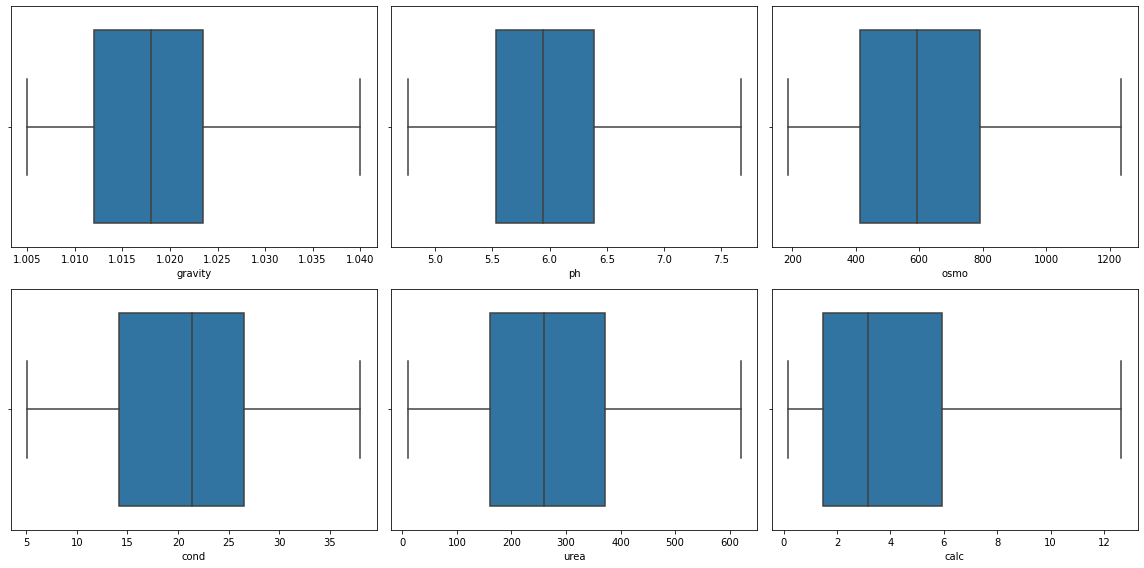

In [18]:
def outliers(i):
    winsor = Winsorizer(capping_method = "iqr",
                            tail = "both",
                            fold = 1.5,
                            variables = [i])
    data[i] = winsor.fit_transform(data[[i]])
    return data[i]

for i in data.iloc[:,:-1].columns:
    outliers(i)

display(data)

#####################################

plt.figure(figsize = (16,8))

for i,j in enumerate(data.iloc[:,:-1].columns):

    plt.subplot(2,3,i+1)

    sns.boxplot(data[j])
    plt.xlabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()

In [19]:
data.iloc[:,:-1] = MinMaxScaler().fit_transform(data.iloc[:,:-1])
data

,gravity,ph,osmo,cond,urea,calc,target
0,0.457143,0.051591,0.512869,0.270517,0.709836,0.182912,No
1,0.342857,0.337059,0.371783,0.452888,0.468852,0.346570,No
2,0.085714,0.839209,0.127741,0.297872,0.149180,0.175692,No
3,0.171429,0.257954,0.210677,0.227964,0.350820,0.158845,No
4,0.000000,0.605331,0.000000,0.072948,0.132787,0.079422,No
...,...,...,...,...,...,...,...
74,0.571429,1.000000,0.509056,0.562310,0.477049,0.711592,Yes
75,0.342857,0.017197,0.212583,0.249240,0.303279,0.032892,Yes
76,0.542857,0.220120,0.587226,0.507599,0.629508,0.613718,Yes
77,0.314286,0.705073,0.387989,0.495441,0.401639,0.965102,Yes


In [20]:
col = list(data.columns)

predictor = col[:-1]
target = col[-1]

display(predictor, target)

['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

'target'

In [21]:
train, test = train_test_split(data, test_size = 0.2, random_state = 0, stratify = data["target"])
display(train, test)

,gravity,ph,osmo,cond,urea,calc,target
1,0.342857,0.337059,0.371783,0.452888,0.468852,0.346570,No
24,0.514286,0.316423,0.535748,0.726444,0.375410,0.108303,No
57,0.428571,1.000000,0.362250,0.443769,0.331148,0.532692,Yes
37,0.428571,0.546862,0.492850,0.589666,0.409836,0.263939,No
34,0.514286,0.374893,0.746425,1.000000,0.577049,0.350582,No
...,...,...,...,...,...,...,...
41,0.114286,0.302666,0.189704,0.382979,0.154098,0.084236,No
62,0.828571,0.165090,1.000000,0.674772,1.000000,1.000000,Yes
23,0.428571,0.412726,0.423260,0.185410,0.675410,0.110710,No
43,0.142857,0.416165,0.148713,0.252280,0.190164,0.171681,No


,gravity,ph,osmo,cond,urea,calc,target
65,0.228571,0.282029,0.313632,0.477204,0.285246,0.251103,Yes
42,0.285714,0.698194,0.337464,0.480243,0.290164,0.198155,No
77,0.314286,0.705073,0.387989,0.495441,0.401639,0.965102,Yes
68,0.571429,0.736028,0.722593,0.866261,0.632787,0.321701,Yes
36,0.085714,0.564058,0.146806,0.288754,0.188525,0.068191,No
0,0.457143,0.051591,0.512869,0.270517,0.709836,0.182912,No
19,0.257143,0.474635,0.360343,0.562310,0.334426,0.102688,No
9,0.457143,0.471195,0.564347,0.626140,0.609836,0.163658,No
44,0.428571,0.316423,0.656816,0.933131,0.488525,0.346570,No
3,0.171429,0.257954,0.210677,0.227964,0.350820,0.158845,No


In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs = -1, random_state = 0).fit(train[predictor], train[target])
model

LogisticRegression(n_jobs=-1, random_state=0)

In [23]:
print("For Test")
test_pred = model.predict(test[predictor])
display(pd.crosstab(test[target], test_pred, rownames = ["Actual"], colnames = ["Prediction"]))
print("Accuracy: ", accuracy_score(test[target], test_pred))

print("-------------------------------------")
print("-------------------------------------")

print("For Train")
train_pred = model.predict(train[predictor])
display(pd.crosstab(train[target], train_pred, rownames = ["Actual"], colnames = ["Prediction"]))
print("Accuracy: ", accuracy_score(train[target], train_pred))


For Test


Prediction,No,Yes
Actual,,
No,9,0
Yes,3,4


Accuracy:  0.8125
-------------------------------------
-------------------------------------
For Train


Prediction,No,Yes
Actual,,
No,35,1
Yes,10,17


Accuracy:  0.8253968253968254


In [24]:
model.coef_

array([[ 1.21912737, -0.37811549,  0.09576495, -0.46387168,  0.19260404,
         1.92042742]])

In [25]:
model.intercept_

array([-1.1097038])

# Test Accuracy  : 81%
# Train Accuracy   : 82%

----------------------------------------------------------------------

## RandomizedSearchCV

In [26]:
param = {"penalty":['l1', 'l2', 'elasticnet', 'none'],
            "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
            "max_iter":list(range(100,500)), 
            "multi_class":['auto', 'ovr', 'multinomial']}

In [27]:
model_RS = RandomizedSearchCV(estimator = model,
                                param_distributions = param,
                                random_state = 0,
                                scoring = "accuracy",
                                n_jobs = -1,
                                cv = 5).fit(train[predictor], train[target])
model_RS

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(n_jobs=-1, random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_iter': [100, 101, 102, 103, 104,
                                                     105, 106, 107, 108, 109,
                                                     110, 111, 112, 113, 114,
                                                     115, 116, 117, 118, 119,
                                                     120, 121, 122, 123, 124,
                                                     125, 126, 127, 128, 129, ...],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                        

In [28]:
model_RS.best_score_

0.808974358974359

In [29]:
model_RS.best_params_

{'solver': 'newton-cg',
 'penalty': 'l2',
 'multi_class': 'multinomial',
 'max_iter': 253}

In [30]:
model_RS.best_estimator_

LogisticRegression(max_iter=253, multi_class='multinomial', n_jobs=-1,
                   random_state=0, solver='newton-cg')

In [31]:
model = model_RS.best_estimator_
model

LogisticRegression(max_iter=253, multi_class='multinomial', n_jobs=-1,
                   random_state=0, solver='newton-cg')

In [32]:
print("For Test")
test_pred = model.predict(test[predictor])
display(pd.crosstab(test[target], test_pred, rownames = ["Actual"], colnames = ["Prediction"]))
print("Accuracy: ", accuracy_score(test[target], test_pred))

print("-------------------------------------")
print("-------------------------------------")

print("For Train")
train_pred = model.predict(train[predictor])
display(pd.crosstab(train[target], train_pred, rownames = ["Actual"], colnames = ["Prediction"]))
print("Accuracy: ", accuracy_score(train[target], train_pred))


For Test


Prediction,No,Yes
Actual,,
No,9,0
Yes,3,4


Accuracy:  0.8125
-------------------------------------
-------------------------------------
For Train


Prediction,No,Yes
Actual,,
No,35,1
Yes,9,18


Accuracy:  0.8412698412698413


In [33]:
model.coef_

array([[ 9.39358700e-01, -2.37997371e-01, -5.61962222e-02,
        -4.48620734e-01, -2.23477783e-04,  1.36147037e+00]])

In [34]:
model.intercept_

array([-0.60179601])

# Test Accuracy  : 81%
# Train Accuracy   : 84%